# Prior estimation

In [1]:
using Revise

In [20]:
import ObjectiveEmpiricalBayes: OptConfig, FEModel, generatedata, cvreference, ReferenceRegularizer, cvscore, ebprior
import Distributions: Uniform
using Random: seed!

using PyPlot
PyPlot.rc("text",usetex=true)

OPTCONFIG=OptConfig(MAXEVAL=10000, XTOLREL=1e-8, DEBUG=false);
linspace(x...) = LinRange(x...) |> collect

linspace (generic function with 1 method)

## The Model

In [21]:
n = 200
ndata = 100
σ = .5
prior = Uniform(0,2)

Uniform{Float64}(a=0.0, b=2.0)

In [22]:
seed!(5)
m = FEModel(f=x->x, xs=linspace(0,2,n), σ=σ) 
mt = FEModel(f=x->x, xs=linspace(0,1,n), σ=σ) # model with restricted domain
d = generatedata(m, prior, ndata);

In [29]:
ncv = 20 
kfold = length(d); # leave one out crossvalidation
#kfold = 20 # coarser crossvalidation for computational speed

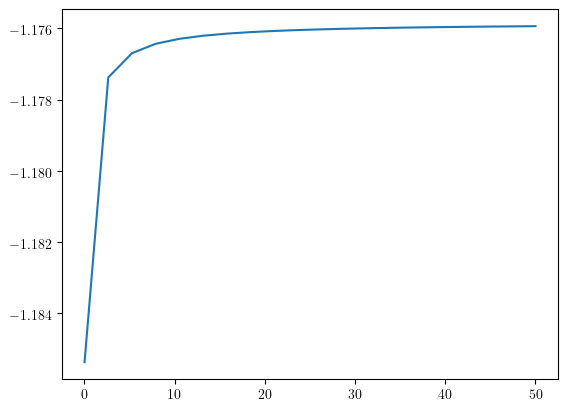

 11.718056 seconds (125.45 M allocations: 22.736 GiB, 9.99% gc time)


50.0

In [31]:
## er estimator
regs = [ReferenceRegularizer(m, γ) for γ in linspace(0.01,50,ncv)]
@time ss = [cvscore(m, d, d->ebprior(m, d, r, OPTCONFIG), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regR = regs[argmax(ss)].γ

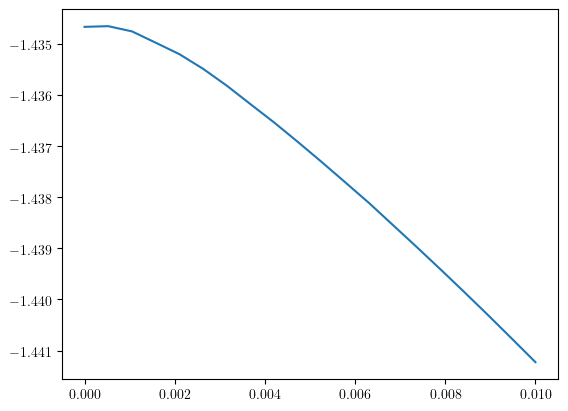

128.955120 seconds (200.08 M allocations: 311.419 GiB, 9.24% gc time)


0.0005263157894736842

In [34]:
## er estimator
regs = [ReferenceRegularizer(mt, γ) for γ in linspace(0,1e-2,ncv)]
@time ss = [cvscore(mt, d, d->ebprior(mt, d, r, OPTCONFIG), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regRt = regs[argmax(ss)].γ

note that we fixed the regularization parameter gamma = regR for the following plot
(crossvalidation leads to gamma -> infty and gamma = 0 for the unrestricted and restricted case)

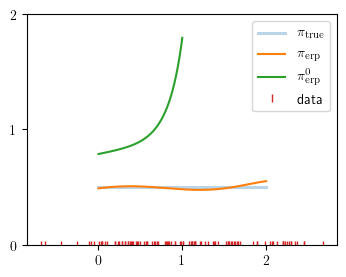

regR = 1.5 = 1.5


In [43]:
@show regR = 1.5
wr  = ebprior(m,  d, ReferenceRegularizer(m,  regR), OPTCONFIG)
wrt = ebprior(mt, d, ReferenceRegularizer(mt, regR), OPTCONFIG)

figure(figsize=(4,3))
plot([0,2],[0.5,.5], label="\$\\pi_{\\rm true}\$", alpha=.3, linewidth=2.2)
plot(m.xs, wr/2*n, label="\$\\pi_{\\rm erp}\$")
plot(mt.xs, wrt*n, label="\$\\pi^0_{\\rm erp}\$")
plot(d, zero(d), marker="|", linestyle=" ", label="data")

ylim(0,2)

yticks([0,1,2])
xticks([0,1,2])
legend()
#vlines(0,1,2)
savefig("counterex.pdf", bbox_inches="tight")
p=gcf();

In [60]:
using MAT
function plt2mat(p, filename)
    d = [(filter(isletter, l.get_label()), hcat(l.get_data()...)) for a in p.axes for l in a.lines ] |> Dict
    matwrite(filename, d)
end

plt2mat (generic function with 1 method)

In [62]:
#plt2mat(p, "counterex.mat")